# **Day04 of Machine Learning**

## **Charts and Graphs - Data Visualization** 
In statistics, charts and graphs are visual representations of data that help illustrate the distribution, relationships, and patterns within datasets. These visuals offer a clear and intuitive way to present data, making complex statistical relationships easier to understand. They transform raw numbers into shapes, lines, and colors, offering both a bird’s-eye view and the ability to detect specific trends or anomalies.
- Charts condense large volumes of data into a simple and understandable format.
- Visuals allow users to easily spot trends, correlations, outliers, and patterns.
- Proper visualization allows DS and ML engineers to:
    - perform exploratory data analysis
    - understand data before modeling
    - understand feature selection and engineering
    - identify data imbalances
    - understand model evaluation, model results,  model interpretability, etc


 &nbsp;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import data
from warnings import simplefilter
import plotly.io as pio

In [2]:
simplefilter(action='ignore', category=FutureWarning)

#### **1. Bar Chart** 
A bar chart consists of rectangular bars where the length of each bar corresponds to the frequency or value of the category it represents. The categories are discrete and usually plotted on the x-axis, while the frequency or value is on the y-axis (for vertical bar charts). \
These are commonly used for comparing different categories such as sales, profit, or population across regions, products, or time periods.
- **Vertical Bar Chart:** Categories on the x-axis, values on the y-axis.
- **_Horizontal Bar Chart:_** Categories on the y-axis, values on the x-axis.
- **_Stacked Bar Chart:_** Shows cumulative totals of different groups within categories.

[Text(0.5, 1.0, 'Average pulse rate by exercise'),
 Text(0, 0.5, 'Average pulse rate')]

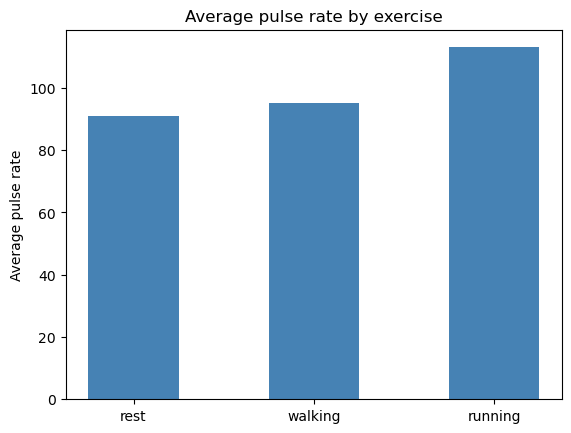

In [3]:
#using matplotlib
exercise = sns.load_dataset("exercise", **{"index_col": 0})
avg_pulse = exercise.groupby("kind", as_index=False)["pulse"].agg("mean")

fig, ax = plt.subplots()
ax.bar(data=avg_pulse, x="kind", height="pulse", width=0.5, color="steelblue")
ax.set(title="Average pulse rate by exercise", ylabel="Average pulse rate")

<Axes: title={'center': 'Provinces where fertility is more than 85'}, xlabel='Fertility', ylabel='Province'>

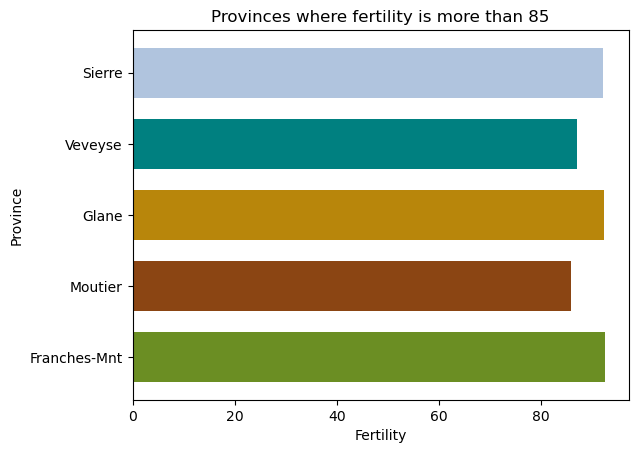

In [4]:
#using pandas

swiss = pd.read_csv("datasets/swissR.csv")

swiss.query("Fertility > 85").plot.barh(
    x="Province", 
    y="Fertility", 
    color=['#6B8E23', '#8B4513', '#B8860B', '#008080', '#B0C4DE'],
    width=0.7,
    xlabel="Fertility",
    title="Provinces where fertility is more than 85",
    legend=False,
)

Text(0, 0.5, 'persons survived')

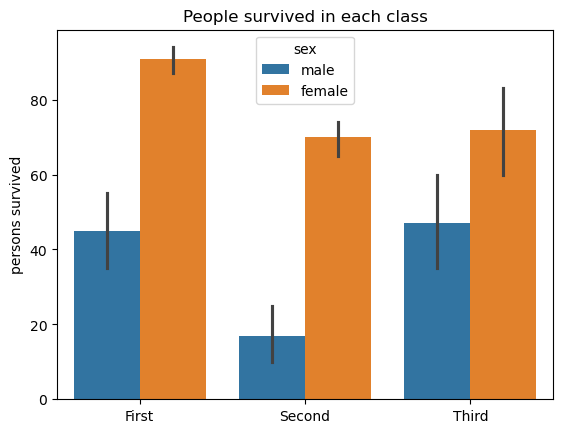

In [5]:
#using seaborn

titanic = sns.load_dataset("titanic")

sns.barplot( 
    data=titanic,
    x="class",
    y="survived",
    estimator="sum",
    hue="sex",
)

plt.title("People survived in each class")
plt.xlabel("")
plt.ylabel("persons survived")

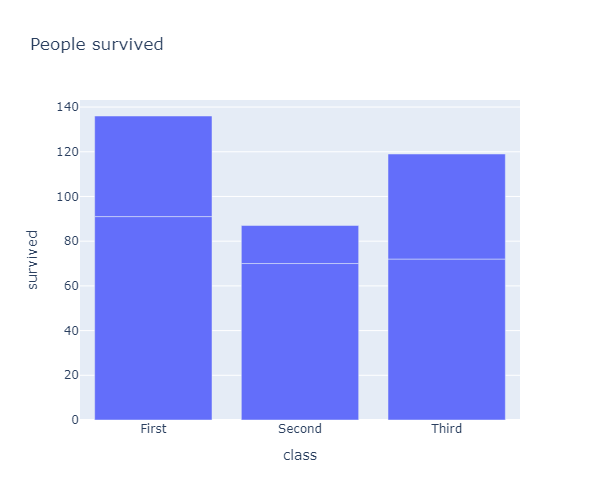

In [6]:
# using plotly

fig = px.bar(
    data_frame=titanic.groupby(["class", "sex"], as_index=False)["survived"].agg("sum"),
    x="class",
    y="survived",
    title="People survived",
    width=600,
    height=500
)

fig.show(renderer="png")

 &nbsp;

#### **2. Line Chart**
Line charts plot data points and connect them with a continuous line. They are typically used for time-series data to show how a variable changes over time. They are commonly used to track trends over time, such as stock prices, temperature changes, or monthly sales figures.

[Text(0.5, 1.0, 'Price of Dowjones'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Price')]

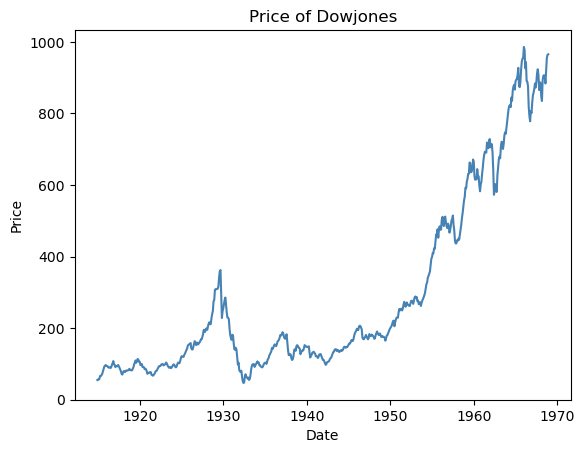

In [7]:
#using matplotlib
dowjones = sns.load_dataset("dowjones")

fig, ax = plt.subplots()

ax.plot("Date", "Price", data=dowjones, color="steelblue")
ax.set(title="Price of Dowjones", xlabel="Date", ylabel="Price")

Text(0.5, 1.0, 'Passengers over the years')

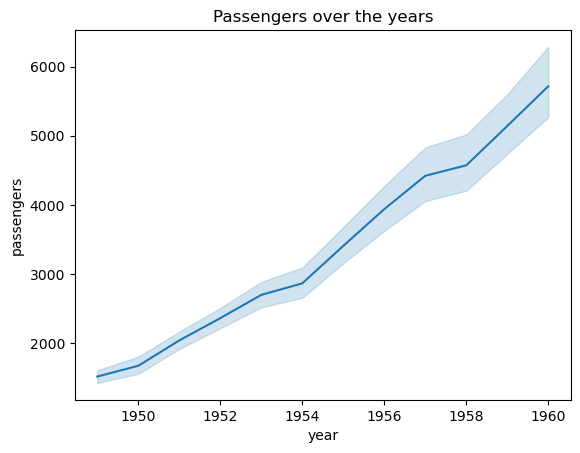

In [8]:
#using seaborn
flights = sns.load_dataset("flights")

sns.lineplot(
    data=flights,
    x="year",
    y="passengers",
    estimator="sum",
)

plt.title("Passengers over the years")

<Axes: title={'center': 'Temperature vs Pressure'}, xlabel='temperature'>

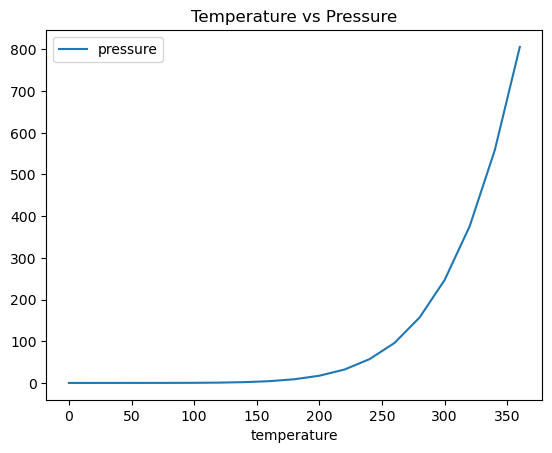

In [9]:
#using pandas
pressure = pd.read_csv("datasets/pressureR.csv", index_col=0)

pressure.plot.line("temperature", "pressure",
                  title="Temperature vs Pressure"
                  )

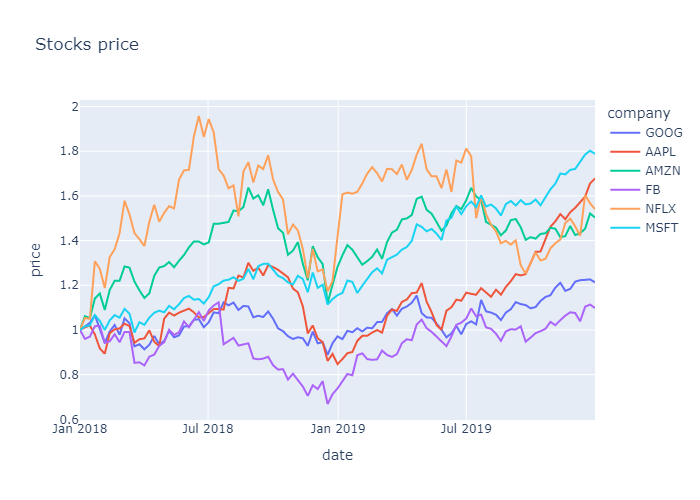

In [10]:
#using plotly
stocks = px.data.stocks()
stocks_long = pd.melt(stocks, id_vars="date", var_name="company", value_name="price")

fig = px.line(
    stocks_long, 
    x="date",
    y="price", 
    color="company",
    title="Stocks price",
    width=700,
    height=500
)

fig.show(renderer="png")

&nbsp;

#### **3. Scatter Plot**
A scatter plot consists of a collection of points, where each point represents a pair of values for two variables. It is used to show relationships or correlations between two continuous variables. \
Scatter plots are useful for identifying correlations (positive, negative, or none) between variables, spotting outliers, and analyzing trends.

[Text(0.5, 1.0, 'Latitude vs Longitude'),
 Text(0.5, 0, 'latitude'),
 Text(0, 0.5, 'longitude')]

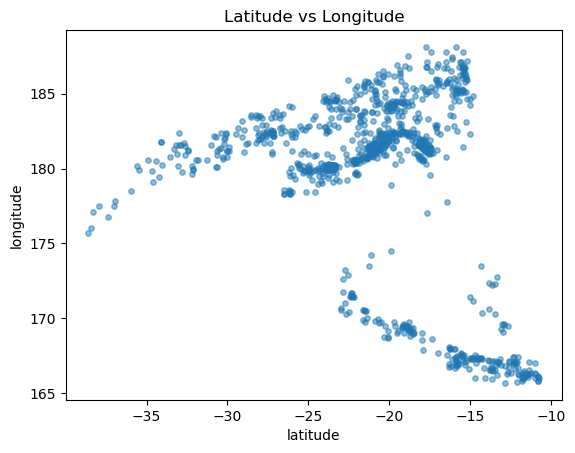

In [11]:
#using matplotlib

quakes = pd.read_csv("datasets/earthquakesR.csv", index_col=0)

fig, ax = plt.subplots()

ax.scatter("lat", "long", data=quakes, s=15,  alpha=0.5,)
ax.set(title="Latitude vs Longitude", xlabel="latitude", ylabel="longitude")

Text(0.5, 1.0, 'Total bill vs Tip')

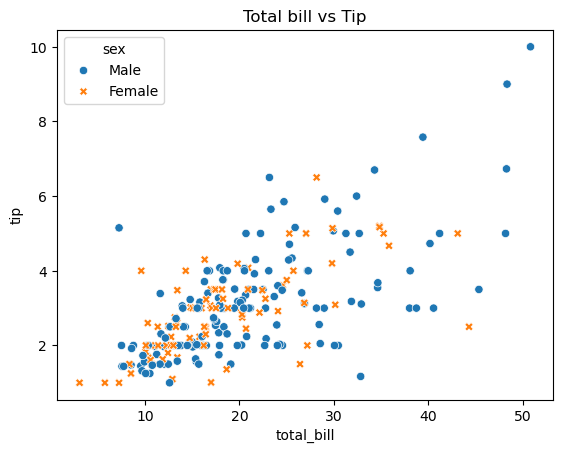

In [12]:
#using seaborn

tips = sns.load_dataset("tips")

sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex", style="sex")
plt.title("Total bill vs Tip")

<Axes: title={'center': 'shape vs perimeter of the rocks'}, xlabel='shape', ylabel='peri'>

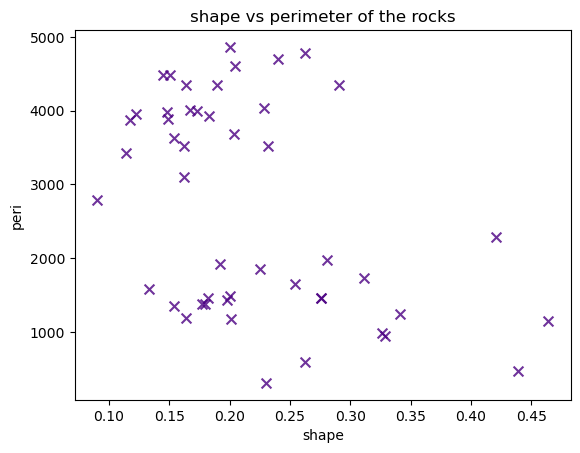

In [13]:
#using pandas 

rock = pd.read_csv("datasets/rockR.csv", index_col=0)

rock.plot.scatter( 
    x="shape",
    y="peri",
    title="shape vs perimeter of the rocks",
    s=50,
    alpha=0.8, 
    color="indigo",
    marker="x"
)

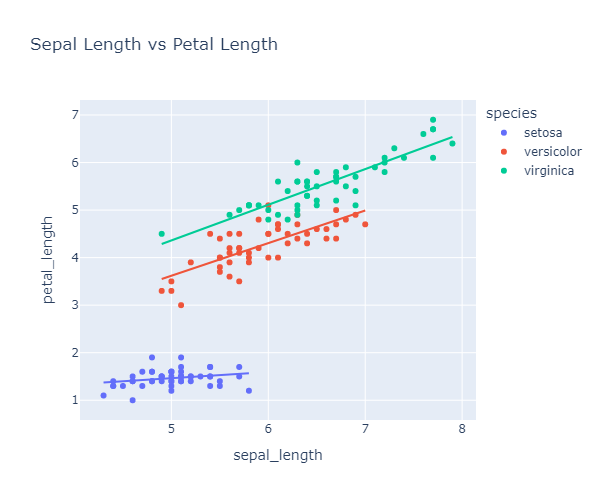

In [14]:
#using plotly

iris = px.data.iris()

fig = px.scatter(
    iris, 
    x="sepal_length",
    y="petal_length",
    color="species",
    title="Sepal Length vs Petal Length",
    width=600,
    height=500,
    trendline="ols"
)

fig.show(renderer="png")

&nbsp;

#### **4. Histogram**
Histograms are similar to bar charts, but they are used for continuous data, grouped into intervals called "bins". The height of each bar indicates the frequency of data points within that bin. \
They are used to visualize the distribution of numerical data, such as exam scores, ages, income ranges, etc.

[Text(0.5, 1.0, 'Histogram of uptake'),
 Text(0.5, 0, 'uptake'),
 Text(0, 0.5, 'count')]

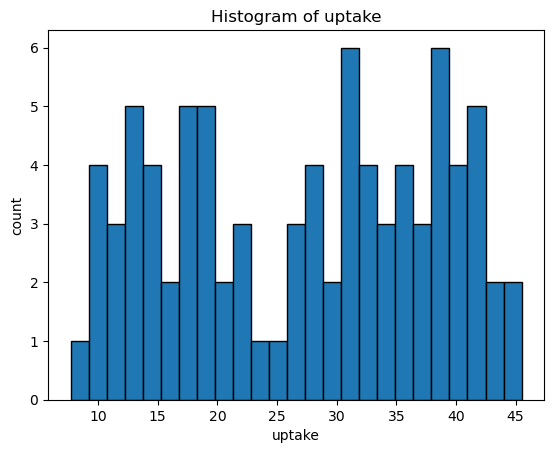

In [15]:
#using matplotlib

fig, ax = plt.subplots()

ax.hist("uptake", bins=25, data=co2, edgecolor="k")
ax.set(title="Histogram of uptake", xlabel= "uptake", ylabel="count")


Text(0.5, 1.0, 'Histogram of flipper length')

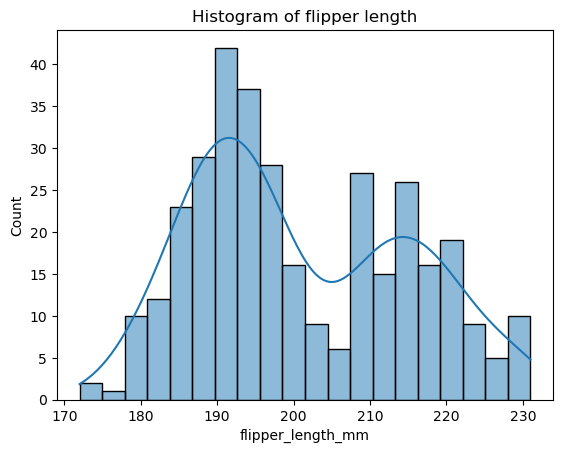

In [16]:
#using seaborn
penguins = sns.load_dataset("penguins")

sns.histplot(
    data=penguins,
    x="flipper_length_mm", 
    binwidth=3,
    kde=True
)

plt.title("Histogram of flipper length")

array([<Axes: title={'center': 'Female'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Male'}, ylabel='Frequency'>], dtype=object)

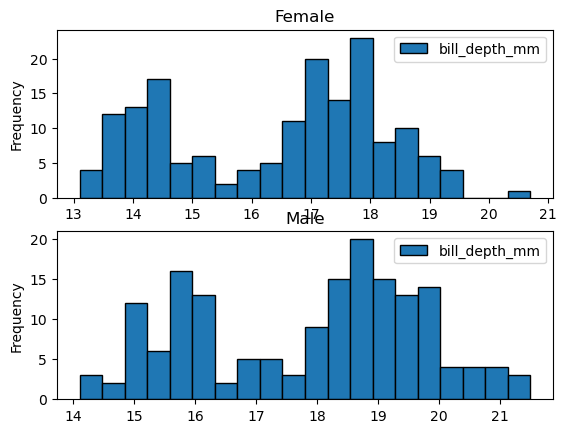

In [17]:
#using pandas

penguins.plot.hist(column=["bill_depth_mm"], by="sex", bins=20, edgecolor="k")

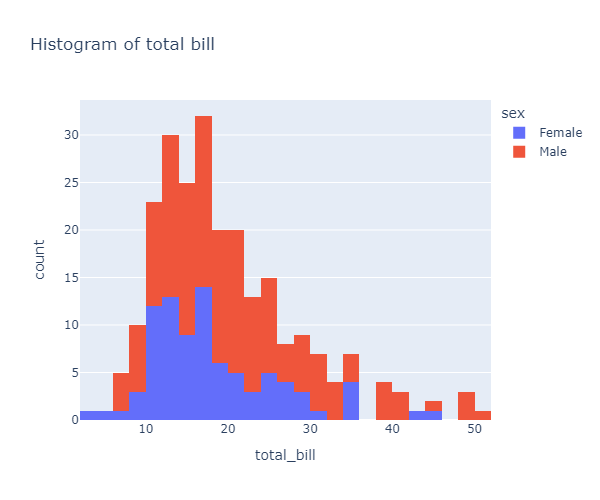

In [18]:
#using plotly

fig = px.histogram(
    tips,
    x="total_bill",
    color="sex",
    title="Histogram of total bill",
    width=600,
    height=500
)

fig.show(renderer="png")

&nbsp;

#### **5. Pie Chart**
A circular chart divided into slices, where each slice represents a category’s contribution to the whole in percentage terms. Pie charts are best for showing relative proportions or percentages of a whole, such as market shares, budget allocations, or demographic data.

Text(0.5, 0.2, 'Percentage of people based on eyes and hairs color')

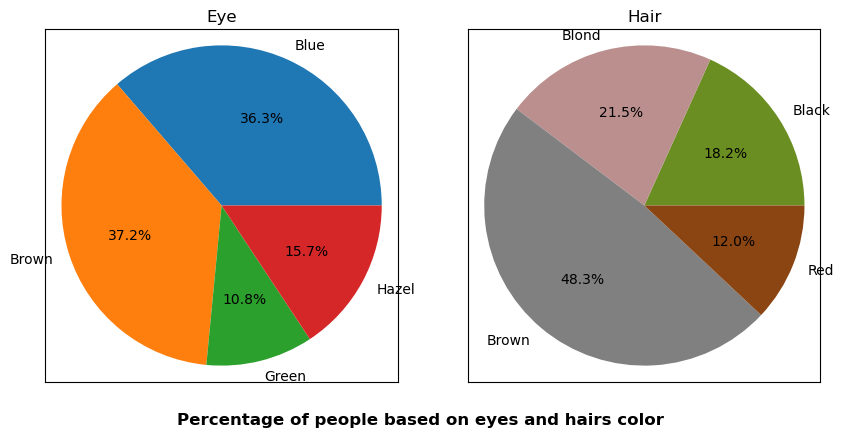

In [19]:
#using matplotlib

hair_eye = pd.read_csv("datasets/HairEyeColorR.csv", index_col=0)

eye = hair_eye.groupby("Eye", as_index=False)["Freq"].agg("sum")
hair = hair_eye.groupby("Hair", as_index=False)["Freq"].agg("sum")

fig, ax = plt.subplots(ncols=2, figsize=(10, 7))

ax[0].pie("Freq", labels="Eye",  data=eye, autopct="%.1f%%", frame=True)
ax[1].pie("Freq", 
          labels="Hair", 
          data=hair, 
          colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown'], 
          autopct="%.1f%%", 
          frame=True
         )

ax[0].set(title="Eye")
ax[1].set(title="Hair")

ax[0].tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

fig.suptitle("Percentage of people based on eyes and hairs color", x=0.5, y=0.2, fontweight="bold")

Text(0.5, 0.2, 'Percentage of people on the basis of eye color')

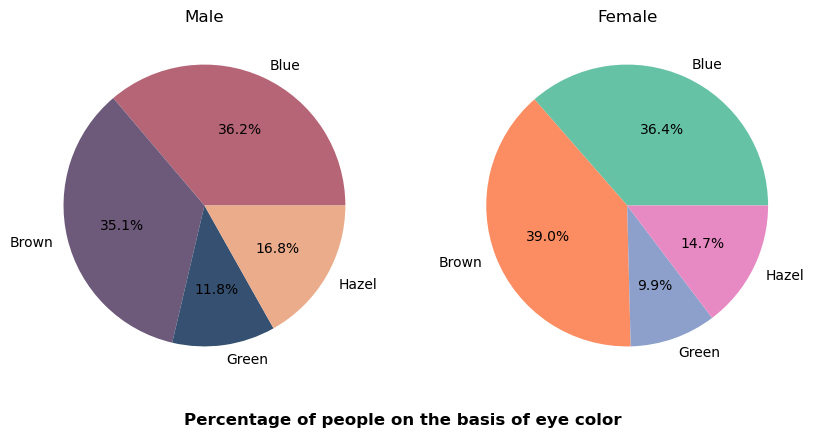

In [20]:
#using pandas
eye = hair_eye.groupby(["Eye", "Sex"], as_index=False)["Freq"].agg("sum")

eye_male = eye.query("Sex == 'Male'")
eye_female = eye.query("Sex == 'Female'")

fig, ax = plt.subplots(ncols=2, figsize=(10, 7))

eye_male.plot.pie(
    y="Freq", 
    labels=eye_male["Eye"], 
    colors = ['#b56576', '#6d597a', '#355070', '#eaac8b'],
    ylabel="", 
    legend=False, 
    autopct="%.1f%%", 
    title="Male", 
    ax=ax[0]
)
eye_female.plot.pie(
    y="Freq", 
    labels=eye_male["Eye"], 
    colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'],
    ylabel="", 
    legend=False, 
    autopct="%.1f%%", 
    title="Female",
    ax=ax[1]
)

fig.suptitle("Percentage of people on the basis of eye color", x=0.5, y=0.2, fontweight="bold")

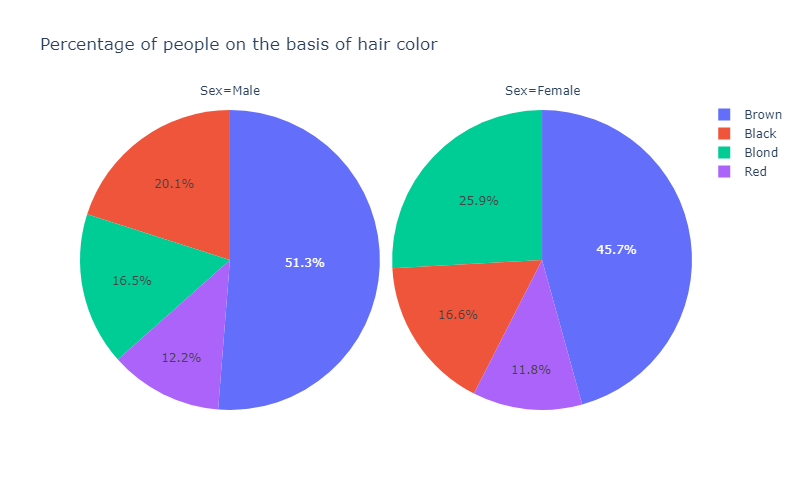

In [21]:
#using plotly

fig = px.pie(
    hair_eye,
    names="Hair",
    values="Freq",
    facet_col="Sex",
    title="Percentage of people on the basis of hair color",
    width=800,
    height=500
)

fig.show(renderer="png")

&nbsp;

#### **6. Bubble Chart**
A bubble chart is an extension of a scatter plot, where each point is represented by a bubble whose size corresponds to a third variable. It visualizes three dimensions of data.
It is useful for comparing the relationship between three continuous variables. It is frequently used in financial analysis or market analysis.

[Text(0.5, 1.0, 'Area vs Perimeter\n with permeability as marker size'),
 Text(0.5, 0, 'area'),
 Text(0, 0.5, 'perimeter')]

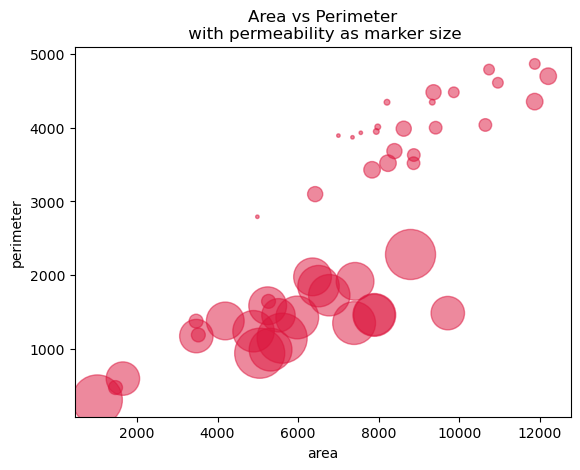

In [22]:
#using matplotlib

fig, ax = plt.subplots()

ax.scatter("area", "peri", data=rock , s="perm", alpha=0.5, color="crimson")
ax.set(title="Area vs Perimeter\n with permeability as marker size", xlabel="area", ylabel="perimeter")

Text(0.5, 1.0, 'Life Expectancy of Countries in Year 2020')

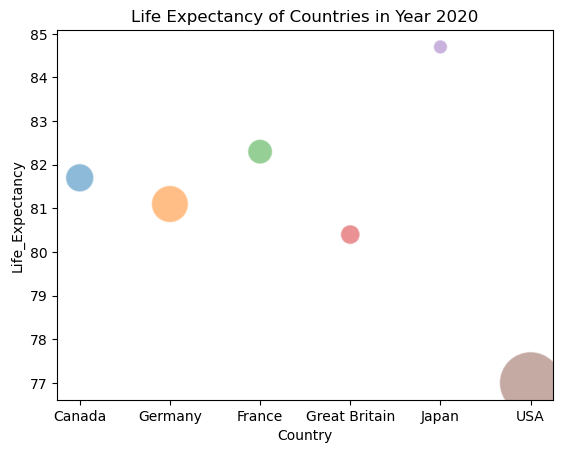

In [23]:
#using seaborn

healthexp = sns.load_dataset("healthexp")
health2020 = healthexp.query("Year == 2020")

sns.scatterplot(
    data=health2020,
    x="Country",
    y="Life_Expectancy",
    size="Spending_USD",
    sizes=(100, 2000),
    alpha=0.5,
    hue="Country",
    legend=False
)
plt.title("Life Expectancy of Countries in Year 2020")

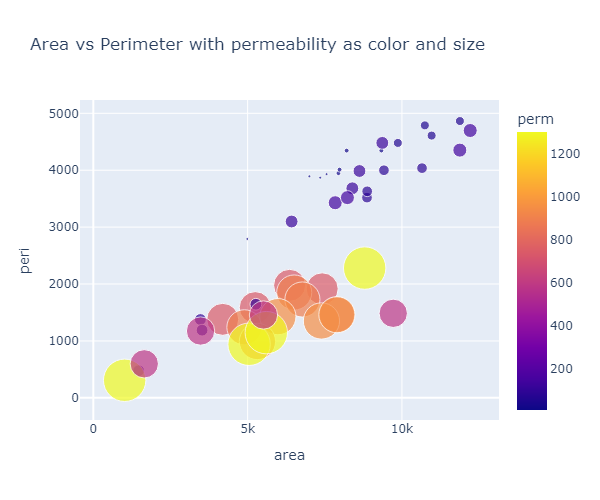

In [24]:
#using plotly 

fig = px.scatter(
    rock,
    x="area",
    y="peri",
    size="perm",
    color="perm",
    size_max=30,
    title="Area vs Perimeter with permeability as color and size",
    width=600,
    height=500
)

fig.show(renderer="png")

&nbsp;

#### **7. Area Chart**
Area charts are similar to line charts, as they display quantitative data graphically, but the area between the line and the x-axis is filled with color. They are suitable for showing how quantities accumulate over time, especially when comparing multiple categories.

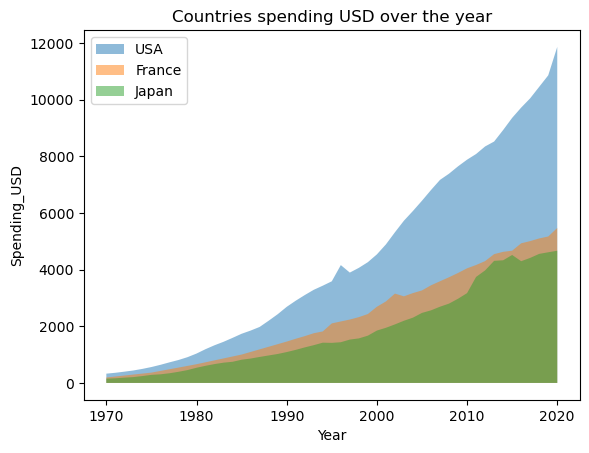

In [25]:
#using matplotlib

fig, ax = plt.subplots()

ax.fill_between("Year", "Spending_USD", data=healthexp.query("Country == 'USA'"), label="USA", alpha=0.5)
ax.fill_between("Year", "Spending_USD", data=healthexp.query("Country == 'France'"), label="France", alpha=0.5)
ax.fill_between("Year", "Spending_USD", data=healthexp.query("Country == 'Japan'"), label="Japan", alpha=0.5)
ax.set(title="Countries spending USD over the year", xlabel="Year", ylabel="Spending_USD")
ax.legend(loc="upper left")

<Axes: title={'center': 'UK Gas consumption in each Quarter over the years'}>

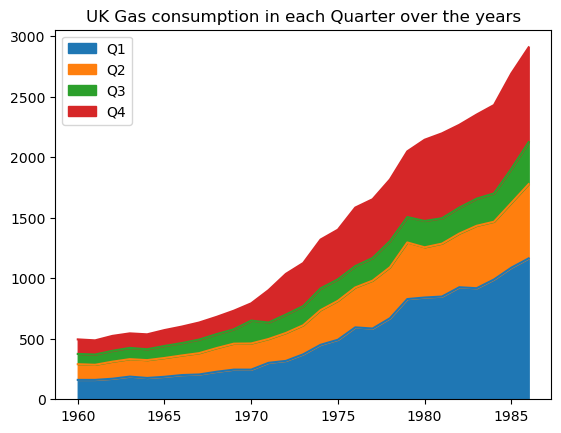

In [26]:
#using pandas
ukgas = pd.read_csv("datasets/UKgasR.csv", index_col=0)

ukgas.plot.area(title="UK Gas consumption in each Quarter over the years")

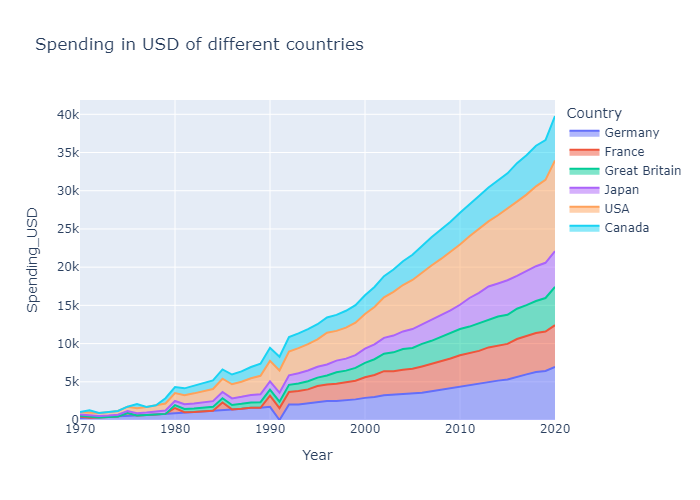

In [27]:
#using plotly 
fig = px.area(
    healthexp,
    x="Year",
    y="Spending_USD", 
    color="Country",
    title="Spending in USD of different countries", 
    width=700,
    height=500
)

fig.show(renderer="png")

&nbsp;